# Day 1

We calculate the log(likelihood) on each gridding point of (mean(vr), dispersion(vr)) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
data_path = '../Materials/data/'

In [3]:
df = pd.read_csv(data_path+'Cas3_total.csv')


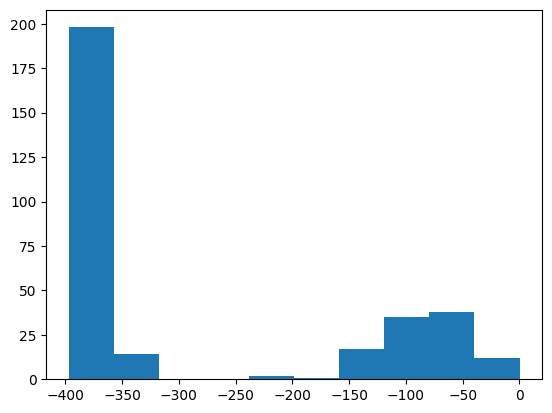

In [4]:
plt.figure()
plt.hist(df['vr']);

In [5]:
ind_dg = df['vr'] <= -300


In [6]:
dg = df[ind_dg]
vr_cas3 = np.array(dg['vr'])
print (len(vr_cas3))

212


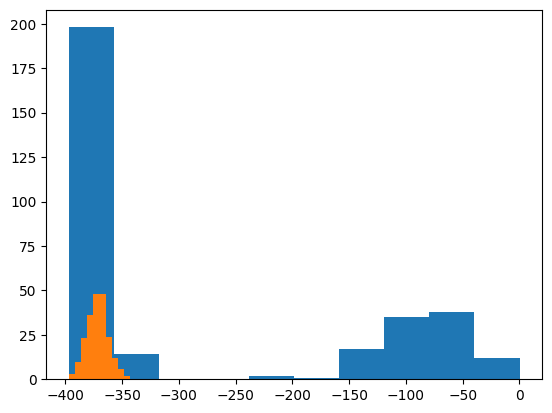

In [7]:
plt.figure()
plt.hist(df['vr']);
plt.hist(dg['vr']);

In [27]:
# Now let's create a grid of 50x50 points in the range of -380 to -360 for mvr and 7 to 12 for dvr
mvr_grid = np.arange(-380, -360, .4)
dvr_grid = np.arange(7, 12, 0.1)

In [31]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likelihood(mvr, dvr, vr_dg):

    
    logL = np.sum(np.log(1/(dvr * np.sqrt(2 * np.pi))) - ((vr_dg - mvr)**2) / (2 * dvr**2))

    return logL

In [32]:
# Then we crate a 2D array (matrix) to store the log(L) for each pair of (mean(vr), dispersion(vr)). The default value is 0.
logL_grid = np.zeros((len(mvr_grid), len(dvr_grid)))
print (logL_grid.shape)


(50, 50)


In [33]:
# We now can calculate the log(L) for each gridding point
for i in range(logL_grid.shape[0]):
    for j in range(logL_grid.shape[1]):
        logL_grid[i, j] = log_Likelihood(mvr_grid[i], dvr_grid[j], vr_cas3)

print (logL_grid)

[[ -963.01685941  -956.07571392  -949.50413575 ...  -843.56008343
   -843.21565776  -842.90994681]
 [ -948.65049207  -942.11118307  -935.92481477 ...  -838.41761868
   -838.1599841   -837.93888545]
 [ -934.97636962  -928.81953459  -922.99981477 ...  -833.52294413
   -833.34791861  -833.20735519]
 ...
 [-1036.1143288  -1027.12860025 -1018.59703699 ...  -869.72544248
   -868.9394153   -868.20318881]
 [-1054.28347166 -1044.78954054 -1035.77080242 ...  -876.22911697
   -875.3333251   -874.49008946]
 [-1073.14485941 -1063.1233632  -1053.59888884 ...  -882.98058164
   -881.97084305  -881.01652121]]


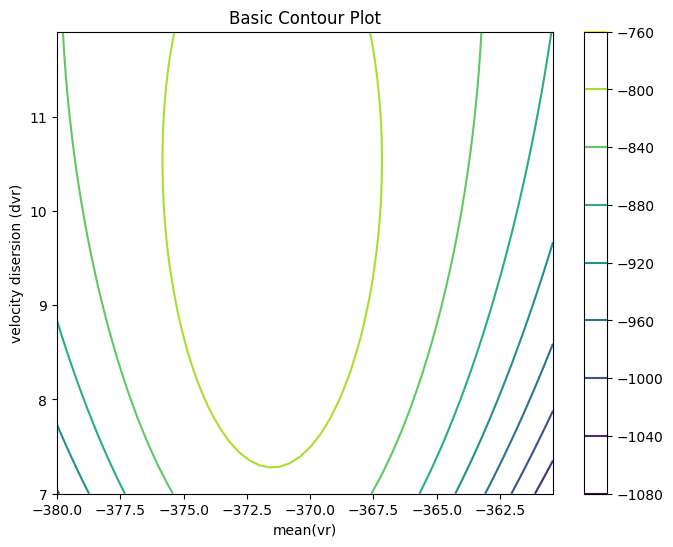

In [42]:
# Here comes to the visualizations!
# Note that when we plot in contour and imshow, the 2D array need to be inverted !!
# This is the contour plot of logL, whic does not make too much senses

plt.figure(figsize=(8, 6))
contour = plt.contour(mvr_grid, dvr_grid, logL_grid.T)
plt.colorbar(contour)  # Add colorbar
plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()

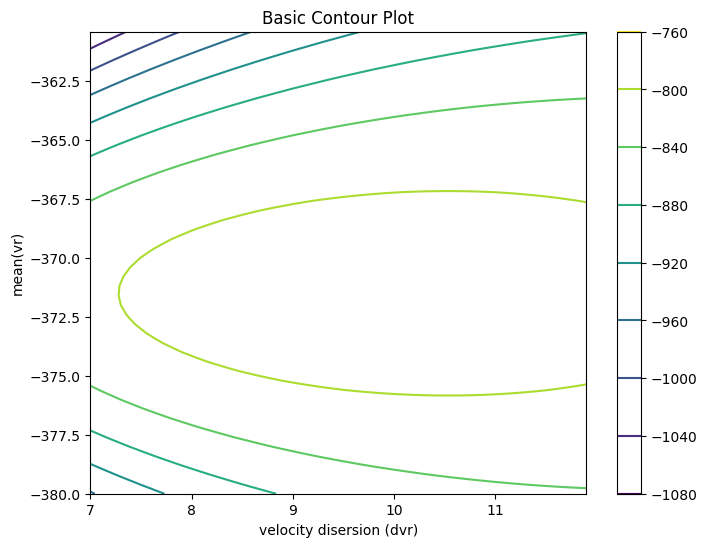

In [43]:
plt.figure(figsize=(8, 6))
contour = plt.contour(dvr_grid, mvr_grid, logL_grid)
plt.colorbar(contour)  # Add colorbar
plt.title('Basic Contour Plot')
plt.ylabel('mean(vr)')
plt.xlabel('velocity disersion (dvr)')
plt.show()

In [35]:
# Let's get the likelihood values instead! 
# In order to do that, we need to the maximum likelihood vaues, as well as parameters that give the maximum likelihood
print (np.max(logL_grid))

max_indices = np.where(logL_grid == np.max(logL_grid))
max_row, max_col = max_indices[0][0], max_indices[1][0]

print (max_row, max_col)
print(mvr_grid[max_row], dvr_grid[max_col])

-780.2981773394453
21 26
-371.6000000000005 9.59999999999999


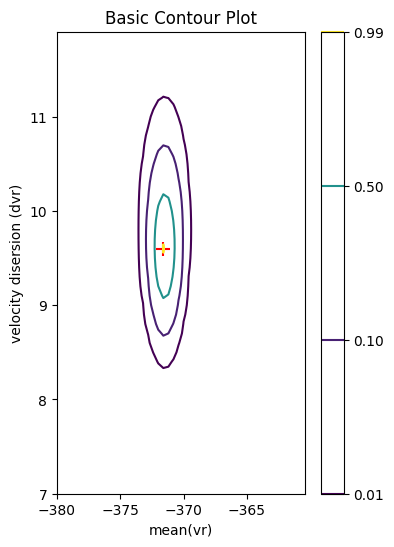

In [36]:
# This is the contour plot of Likelihood, we want it to be normalized to the maximum value
levels = np.array([0.01, 0.1, 0.5, 0.99])
plt.figure(figsize=(4, 6))
contour = plt.contour(mvr_grid, dvr_grid, np.exp(logL_grid.T-np.max(logL_grid)), levels=levels)
plt.scatter(mvr_grid[max_row], dvr_grid[max_col], marker="+", color='red', s=100)
cbar = plt.colorbar(contour)  # Add colorbar

plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()